## PROJECT - PREDICTION OF ACCEPTANCE OF ADMISSION INTO A UNIVERSITY¶

### Problem Statement:
To predict the Acceptance of Admission into a University using Machine Learning Algorithm called Multiple Linear Regression,Random Forest Regressor,Decision Tree Algorithm.

### Aim of the project:
It is to help students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their admission chances in a particular university. This analysis should also help students who are currently preparing or will be preparing to get a better idea.

### Objective of the Project:
400 applicants have been surveyed as potential students for UCLA. The university weighs certain aspects of a student's education to determine their acceptance.

The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.

### Importing the Libraries

In [1]:
#Importing the libraries wich are needed for the prediction.
import numpy as np
import pandas as pd
#import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

### Reading the Data Set

In [2]:
# read_csv is a pandas function to read csv files.
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Handling Missing Values

In [3]:
#dropna() is a function which drops all the rows and columns which are having the missing values(i.e. NaN)
data.dropna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
#fillna() is a function which replaces all the missing values using different ways.
data.fillna(0)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
# interpolate() is a function which comes up with a guess value based on the other values in the dataset and fills those guess values in the place of missing values.
data.interpolate()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
#mean Imputation
data.fillna(data.mean())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
#median imputation
data.fillna(data.median())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### Exploratory Data Analysis:

### Data Description
The dataset contains information about a student's:

* GRE Score
* TOEFL Score
* University Ratings
* Statement of Purpose Score
* Letter of Recomendation Score
* CGPA
* Whether the Student Has Done Any Research
* Chance of Admission (What We're Trying to Predict)

In [8]:
#Describes the datatype of column names.
data.dtypes 

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
#info() function is used to get a concise summary of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
#Showing no.of columns and rows
data.shape

(400, 9)

In [11]:
#Column names of data set
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
#nunique() function return number of unique elements in the object.
data.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [13]:
#Computes a summary of statistics.
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Data Cleaning

In [14]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
data = data.drop("Serial No.", axis=1) #dropping the  serial number column as it does not have any value for the prediction
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
data.isnull().sum() #There are no missing values in the data.

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
data.head() #Returning the rows of the data series.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Data Visualization

In [18]:
data.groupby('University Rating').mean() #Splitting the data based on University Rating.

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


#### Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.¶

In [19]:
data[data['Chance of Admit']>0.82].groupby('Chance of Admit').mean() #Splitting the data based on Chance of Admit above 0.82.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,
0.83,326.000000,112.666667,3.666667,3.833333,4.166667,9.120000,0.666667
0.84,324.000000,109.444444,3.444444,3.777778,3.555556,9.038889,1.000000
0.85,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,325.500000,114.750000,4.250000,4.312500,4.437500,9.107500,0.875000
0.87,326.400000,111.400000,4.400000,4.400000,4.200000,9.072000,0.800000
0.88,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,329.111111,113.666667,4.444444,4.333333,4.166667,9.263333,0.888889
0.90,331.000000,116.125000,4.000000,4.562500,4.062500,9.305000,1.000000
0.91,331.714286,114.857143,4.428571,4.285714,4.428571,9.358571,1.000000


### Histogram of Admission Chance
#### Let us visualize our data to get a much clearer picture of the data and the significant features.

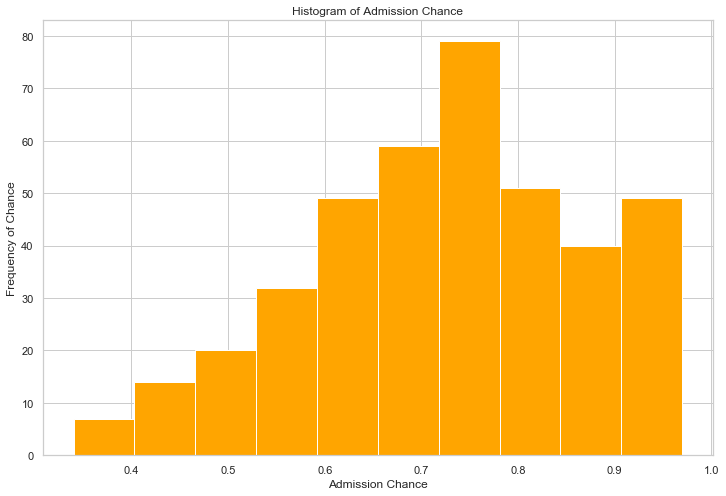

In [20]:
import matplotlib.pyplot as plt #Histogram of Admission Chance
plt.figure(figsize=(12,8))
plt.hist(data['Chance of Admit'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

#### Histogram shows us that 'chance of admission' column is well distributed in data.

## Line Plot for Research Output and The Chance of Admission

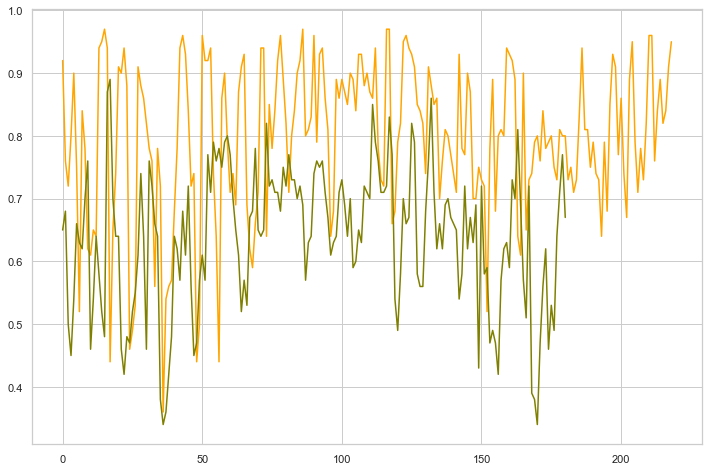

In [21]:
plt.figure(figsize=(12,8)) #Line plot for Research and chance of Admit
plt.plot(range(len(data[data['Research']==1])), data[data['Research']==1]['Chance of Admit'], color='orange')
plt.plot(range(len(data[data['Research']==0])), data[data['Research']==0]['Chance of Admit'], color='olive')
plt.show()

#### The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.

## Scatter Plot of University Rating and The Chance of Admission¶


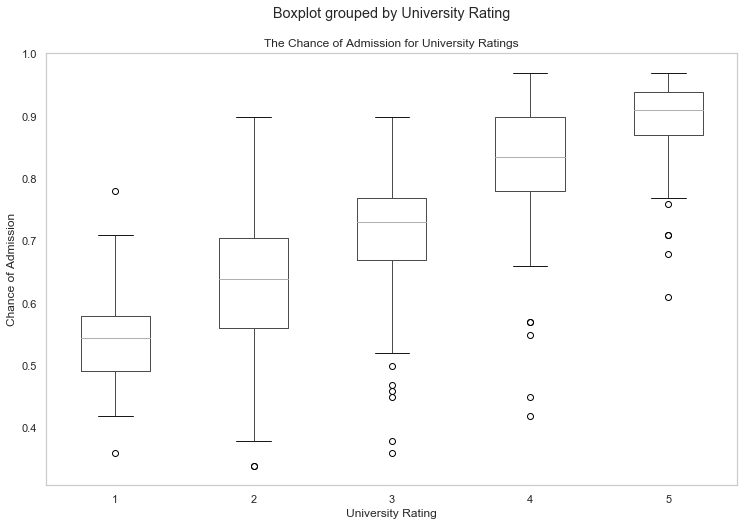

In [22]:
#A box plot is a method for graphically depicting groups of numerical data through their quartiles.
data.boxplot(column='Chance of Admit',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

#### As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

## Histogram of Numeric Variables

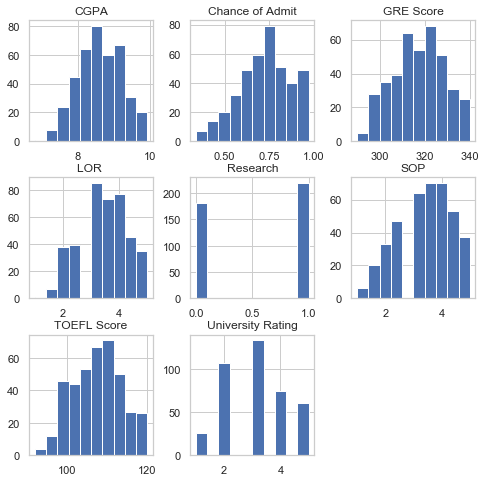

In [23]:
#A histogram is a representation of the distribution of data.
#This function calls matplotlib.pyplot.hist(),on each series in the DataFrame,resulting in one histogram per column.
data.hist(bins=10, figsize=(8,8)) 
plt.show()

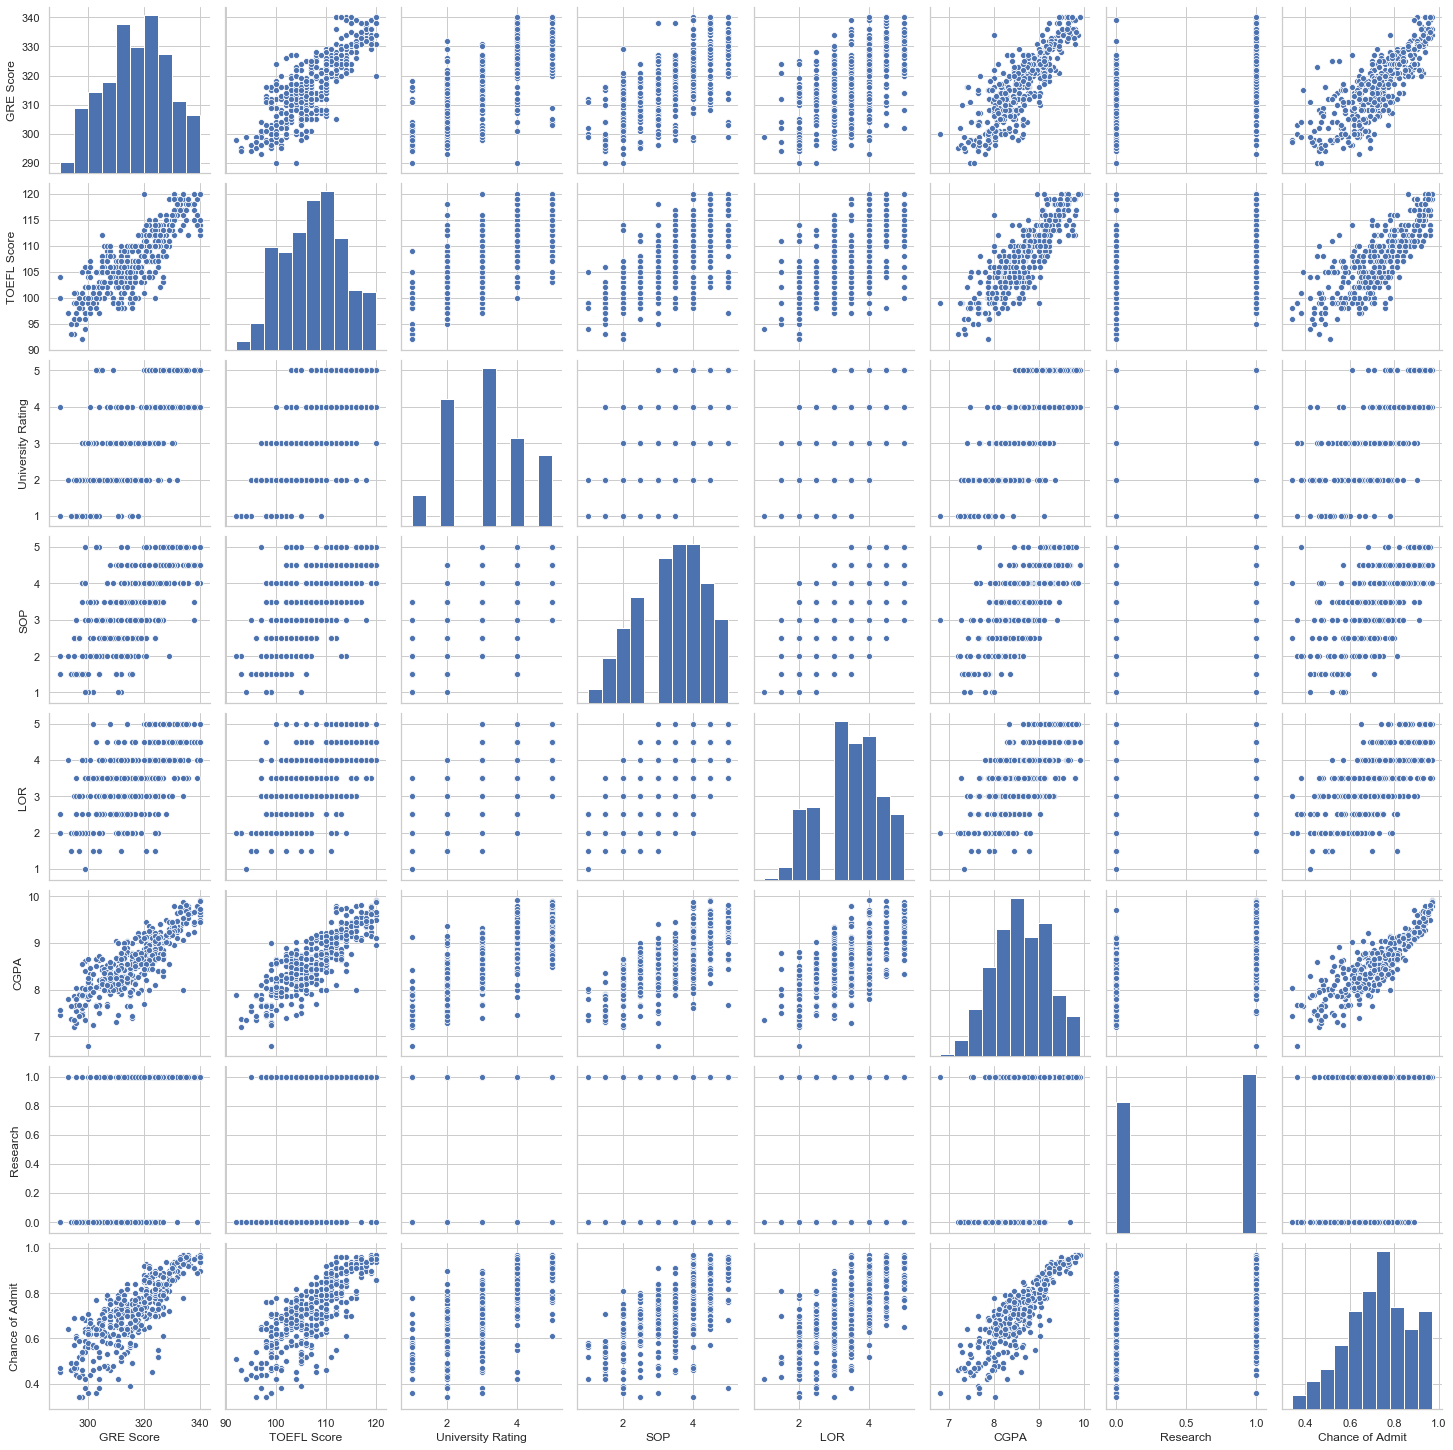

In [24]:
sns.pairplot(data) #pairplot allows to see both distribution of single variables and relationship between two variables.

In [25]:
#Corelation is a statistical technique that can show whether and how strongly pairs of variables are related.
corelation = data.corr() 

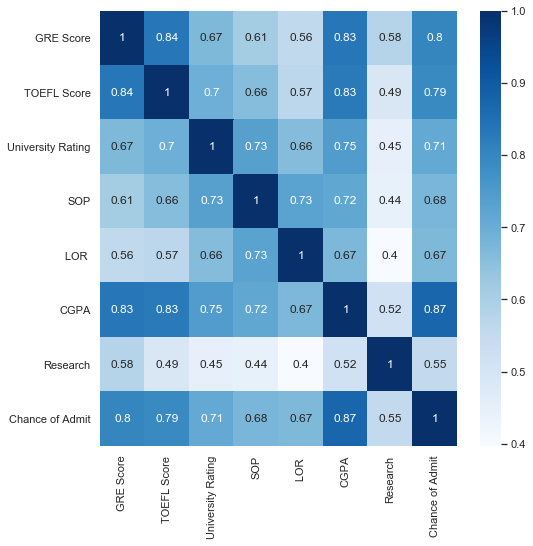

In [26]:
fig, ax = plt.subplots(figsize=(8,8)) #heatmap is used to provide coloured visual summary of information.
sns.heatmap(data.corr(), annot=True, cmap='Blues')

### The top three features that affect the Chance to Admit are:

1. CGPA
2. GRE Score
3. TOEFL Score

### CGPA
The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

### CGPA vs Chance of Admit
It appears as applicant's CGPA has a strong correlation with their chance of admission.

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

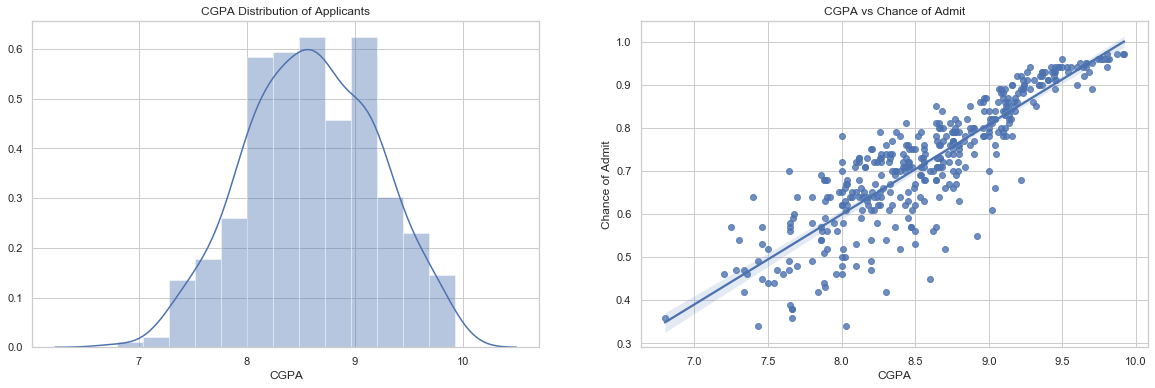

In [27]:
plt.figure(figsize=(20,6)) #subplot and distplot for CGPA vs Chance of Admit
plt.subplot(1,2,1)
sns.distplot(data['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['CGPA'], data['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

### GRE Score
The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

1. Analytical Writing (Scored on a 0-6 scale in half-point increments)
2. Verbal Reasoning (Scored on a 130-170 scale)
3. Quantitative Reasoning (Scored on a 130-170 scale)

In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

### GRE Score vs Chance of Admit
GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

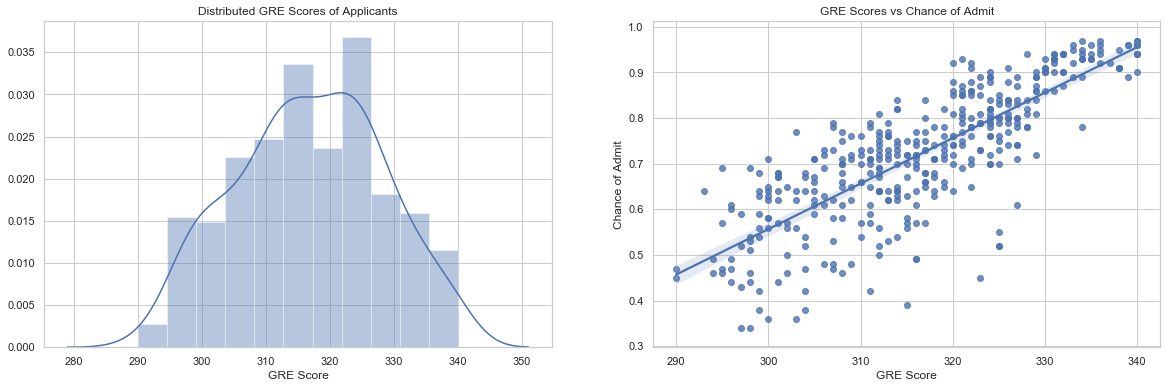

In [28]:
plt.figure(figsize=(20,6)) #subplot and distplot for GRE Score vs Chance of Admit
plt.subplot(1,2,1)
sns.distplot(data['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['GRE Score'], data['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

### TOEFL Score
The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

1. Reading
2. Listening
3. Speaking
4. Writing

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

### TOEFL Score vs Chance of Admit
Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

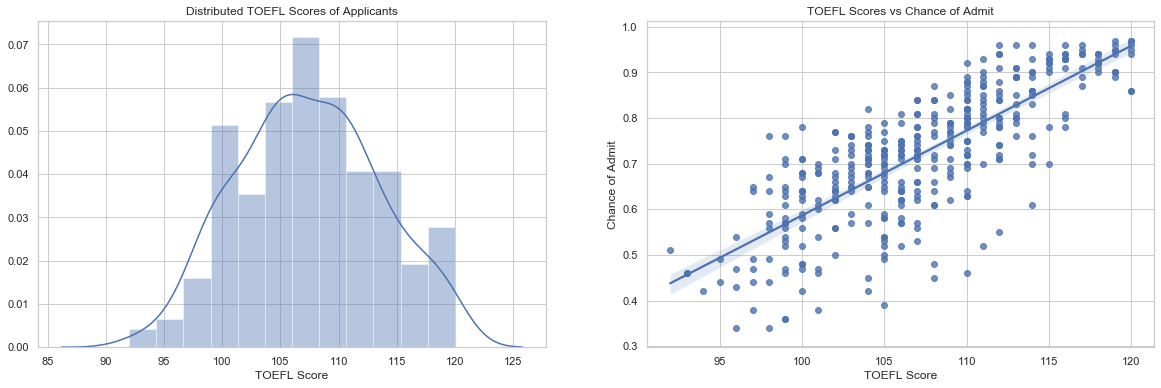

In [29]:
plt.figure(figsize=(20,6)) #subplot and distplot for TOEFL Score vs Chance of Admit
plt.subplot(1,2,1)
sns.distplot(data['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['TOEFL Score'], data['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

### Research
Let's explore how many applicants have research experience.

It seems the majority of applicants have research experience. However, this is the least important feature, so it doesn't matter all too much if an applicant has the experience or not.

[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

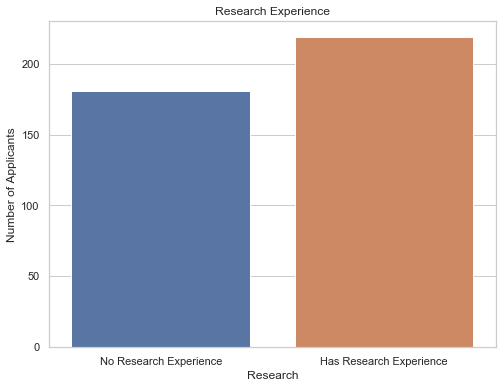

In [30]:
fig, ax = plt.subplots(figsize=(8,6)) #countplot for Research experience and No Research experience
sns.countplot(data['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

### University Rating
Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

Text(0, 0.5, 'Number of Applicants')

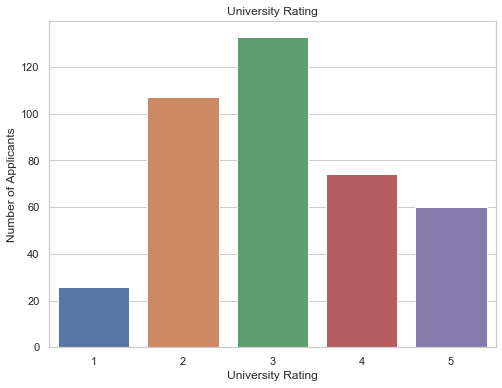

In [31]:
fig, ax = plt.subplots(figsize=(8,6)) #countplot for University Rating
sns.countplot(data['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

## Train Test Split

### Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [32]:
targets = data['Chance of Admit']
features = data.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
#random_state acts for the random number generator during the split.

In [33]:
print(X_train.shape) #Splitting the data
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


### The training set is a subset of the data set used to train a model.
### The test set is a subset of the data set that you use to test your model.

In [34]:
X_train #X_train is the training data set.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [35]:
y_train #y_train is the set of labels to all the data in X_train.

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit, Length: 320, dtype: float64

In [36]:
X_test #X_test is the test data set.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [37]:
y_test #y_test is the set of labels to all the data in X_test.

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit, Length: 80, dtype: float64

### Data normalization is important in order to represent data in comparable scales.

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Classification Models & Furher Analysis¶

#### In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 82% chance. Third quartile, 82%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [39]:
import numpy as np
cy_train=[1 if chance > 0.82 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.82 else 0 for chance in y_test]
cy_test=np.array(cy_test)

## Machine Learning 
Now we'll implement machine learning algorithms to predict the chance of admission. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

* Linear Regression
* Decision Trees
* Random Forests

## Linear Regression

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

81.73867881114431

In [41]:
pred=linreg.predict(X_test) #Predicting the output
pred

array([0.64960648, 0.71738274, 0.91774571, 0.81014755, 0.58223945,
       0.91188206, 0.52788616, 0.54467028, 0.65374179, 0.82488204,
       0.71166893, 0.89084096, 0.55478311, 0.87627046, 0.6981535 ,
       0.68063114, 0.6612734 , 0.48609653, 0.68503068, 0.95614138,
       0.58598453, 0.64802493, 0.70365294, 0.53626631, 0.9286906 ,
       0.79804046, 0.68939857, 0.56486654, 0.67776552, 0.79844667,
       0.79650153, 0.92936427, 0.64282928, 0.51358696, 0.65512311,
       0.664326  , 0.70763591, 0.64184359, 0.61257405, 0.85807747,
       0.73494542, 0.59636953, 0.76472016, 0.9412335 , 0.83924394,
       0.82340072, 0.9275214 , 0.64353798, 0.90690388, 0.84621644,
       0.8820992 , 0.72192253, 0.77982432, 0.93417622, 0.5725873 ,
       0.58714527, 0.6806041 , 0.83365109, 0.6042551 , 0.8368182 ,
       0.6622477 , 0.65058357, 0.69540682, 0.51596153, 0.62582122,
       0.71108094, 0.62086108, 0.82858153, 0.84329017, 0.78901737,
       0.71546542, 0.80148831, 0.8592166 , 0.82189474, 0.52725

In [42]:
np.mean(pred) #Comparing with original output.

0.7252812500000001

In [43]:
np.mean(y_test) #Comparing with original output.

0.720625

In [44]:
print(linreg.intercept_)
print(linreg.coef_)

0.7252812500000001
[ 0.02099652  0.01639522  0.00844812 -0.00029857  0.01413835  0.0673812
  0.01108222]


### Computing the metrics for mean absolute error, mean squared error, root mean squared eroor, and R-squared, and put them into a DataFrame.

In [45]:
## Test the model on testing data
y_pred = linreg.predict(X_test)  # test data--> unseen data
y_pred
## We need to compare the actual values(y_test) and the predicted
                                                       #values(y_test_pred)
   
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R^2:', r2_score(y_test,y_pred))

print('Adjusted R^2:', 1- (1-r2_score(y_test, y_pred))*(len(X_test)-1)/
                                 (len(X_test)-X_test.shape[1]-1))


print('MAE:', mean_absolute_error(y_test, y_pred))

print('MSE:', mean_squared_error(y_test, y_pred))

R^2: 0.817386788111443
Adjusted R^2: 0.7996327258445
MAE: 0.05013672161921001
MSE: 0.0047156865972212275


### Linear Regression Accuracy

In [46]:
#Linear Regression Accuracy
linreg_score = (linreg.score(X_test,y_test))*100
linreg_score

81.73867881114431

## Decision Tree
Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a
model of decisions and all of their possible results, including outcomes, input costs and
utility.
Decision-tree algorithms fall under the category of supervised learning algorithms. It works
for both continuous as well as categorical output variables.

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)


y_train_pred=dtree.predict(X_train)
y_train_pred


y_test_pred=dtree.predict(X_test)
y_test_pred


## We need to compare the actual values(y_test) and the predicted
                                                        #values(y_test_pred)

array([0.48, 0.73, 0.94, 0.81, 0.59, 0.93, 0.59, 0.38, 0.57, 0.85, 0.79,
       0.93, 0.7 , 0.88, 0.71, 0.75, 0.71, 0.44, 0.67, 0.95, 0.62, 0.67,
       0.63, 0.56, 0.95, 0.8 , 0.74, 0.67, 0.69, 0.8 , 0.8 , 0.92, 0.62,
       0.44, 0.72, 0.68, 0.56, 0.79, 0.73, 0.93, 0.76, 0.65, 0.78, 0.94,
       0.89, 0.81, 0.93, 0.72, 0.93, 0.85, 0.86, 0.74, 0.73, 0.94, 0.58,
       0.6 , 0.72, 0.87, 0.59, 0.87, 0.64, 0.65, 0.77, 0.44, 0.48, 0.52,
       0.67, 0.84, 0.84, 0.85, 0.75, 0.81, 0.91, 0.86, 0.54, 0.76, 0.56,
       0.53, 0.84, 0.85])

### Decision Tree Accuracy

In [48]:
#Decision Tree Accuracy
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

73.99851580517213

## Random Forest

#### I have used random forest algorithm for solving this regression problem. The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

#### n_estimators is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

In [49]:
rf = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [50]:
from sklearn import metrics #MAE,MSE,RMSE scores for Random Forest
print('MAE:', mean_absolute_error(y_test, y_pred))

print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.050737499999999935
MSE: 0.004913828249999997
RMSE 0.0700987036256734


### Random Forest Accuracy

In [51]:
#Random Forest Accuracy
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0) #Random Forest Accuracy
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

81.35407137081936

## Comparing the Accuracy of Linear Regression,Decision Tree,Random Forest

Text(0, 0.5, 'Accuracy')

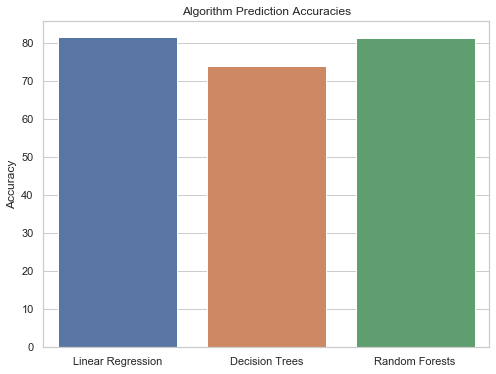

In [52]:
#Comparing Scores
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([linreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

### Selecting the Best Algorithm
* Linear Regression - 81.74%
* Random Forests - 81.35%
* Decision Trees - 73.99%

It seems that Linear Regression is the most accurate of the 3 methods and will be used to predict the future applicant's chances of admission.

### Conclusion
Clearly CGPA is the most important criteria for graduate admission followed by GRE and TOEFL score.

Among the three algorithms, Linear Regression gives the best Accuracy.

As a quick summary, I used multiple linear regression algorithm , random forest algorithm and decision tree algorithm to visualize the importance of each features for graduate admission. This could be of great help for students preparing for their higher studies.
